In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [4]:
# Load the data
data = pd.read_csv("cell2celltrain.csv")

In [5]:
# Drop rows with missing target variable 'Churn' assuming 'Churn' is your target
data = data.dropna(subset=['Churn'])

In [6]:
print(data['Churn'].value_counts())

No     36336
Yes    14711
Name: Churn, dtype: int64


In [7]:
# Check if 'Churn' column exists and convert 'Yes'/'No' to 1/0
if 'Churn' in data.columns:
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
else:
    raise ValueError("Churn column not found in the dataset")

In [8]:
# Impute missing values in features
# Numeric features imputation
num_imputer = SimpleImputer(strategy='median')
data[data.select_dtypes(include=['int', 'float']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['int', 'float']))

In [9]:
# Categorical features imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [10]:
# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Ensure not to encode the target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [11]:
# Assuming 'Churn' is the target variable
#X = data.drop('Churn', axis=1)
#y = data['Churn']


#X = data.drop(['Churn', 'CustomerID'], axis=1)  # Exclude 'CustomerID' and target column 'Churn'
#y = data['Churn']



# Separate CustomerID before feature processing
customer_ids = data['CustomerID']  # Save CustomerID for later use
X = data.drop(['Churn', 'CustomerID'], axis=1)  # Drop 'CustomerID' and 'Churn'
y = data['Churn']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Save CustomerIDs for test set
customer_ids_test = customer_ids.iloc[y_test.index]  # Aligning customer IDs with their corresponding test set

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize and train the Logistic Regression model
#model = LogisticRegression()
#model.fit(X_train_scaled, y_train)


model = LogisticRegression(class_weight='balanced')  # Adjusts weights inversely proportional to class frequencies
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [16]:
X_test.head(20)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
14589,34.43,314.0,30.0,0.00,5.0,2.6,-12.0,-1.2,9.0,2.0,...,0.0,5.0,0,0.0,15,0,1,1,4,2
5048,30.00,153.0,30.0,0.00,0.0,0.0,10.0,0.0,0.7,0.0,...,0.0,4.0,1,1.0,15,0,2,0,3,0
7616,61.11,328.0,57.0,0.99,22.0,0.0,-328.0,-6.5,6.7,15.0,...,0.0,5.0,0,0.0,8,0,2,1,4,2
30623,14.31,350.0,10.0,0.00,1.0,0.0,-150.0,-0.3,0.0,0.0,...,0.0,7.0,0,0.0,15,0,1,0,2,2
11037,30.25,174.0,30.0,0.25,0.0,0.0,56.0,-0.2,2.3,1.0,...,0.0,8.0,0,0.0,8,0,1,0,4,2
32204,182.74,2584.0,96.0,1.49,397.0,0.0,-2496.0,-192.4,65.7,7.0,...,1.0,5.0,0,0.0,2,0,3,0,3,0
31448,43.99,259.0,50.0,0.00,0.0,0.0,-15.0,0.0,3.0,0.0,...,1.0,0.0,0,0.0,15,0,4,0,3,1
47748,61.11,1141.0,66.0,2.72,11.0,0.0,766.0,2.4,15.7,1.7,...,0.0,0.0,0,0.0,15,0,4,2,3,1
43870,45.21,607.0,20.0,0.25,2.0,0.0,-607.0,-45.2,7.3,4.0,...,0.0,5.0,0,0.0,3,0,3,2,3,2
29766,51.04,418.0,50.0,0.00,0.0,0.0,33.0,1.4,3.3,12.0,...,0.0,4.0,0,0.0,15,0,4,0,3,2


In [17]:
# Assuming X_test is already defined and loaded as part of your model testing process
X_test_top200 = X_test.head(200)

# Save the DataFrame to an Excel file
X_test_top200.to_excel('Best_Test_data_New.xlsx', index=False, engine='openpyxl')

In [18]:
# Predict on the testing set
y_pred = model.predict(X_test_scaled)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model to disk
joblib.dump(model, 'churn_model.pkl')

# Save the scaler and label encoders as well for consistent preprocessing in deployment
joblib.dump(scaler, 'scaler.pkl')

# Save the dictionary of label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')


#for column, le in label_encoders.items():
    #joblib.dump(le, f'{column}_encoder.pkl')

Accuracy: 0.5935357492654261
Confusion Matrix:
 [[4402 2906]
 [1244 1658]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.60      0.68      7308
         1.0       0.36      0.57      0.44      2902

    accuracy                           0.59     10210
   macro avg       0.57      0.59      0.56     10210
weighted avg       0.66      0.59      0.61     10210



['label_encoders.pkl']

In [20]:
# Step 1: Calculate the probabilities for the positive class
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probability of churn

In [21]:
# Step 2: Define a new threshold
threshold = 0.5  # Example of a lower threshold

In [22]:
# Step 3: Generate predictions based on the new threshold
predictions = (probabilities >= threshold).astype(int)

In [23]:
# Assuming 'customer_ids_test' contains the IDs of the customers in the test set
results = [
    f"Customer {cid}: {'will stay with the company' if pred == 0 else 'is about to churn'} - Churn Probability: {prob:.2f}"
    for cid, pred, prob in zip(customer_ids_test, predictions, probabilities)
]


In [24]:
# Print the first 10 results to check the outcome
for result in results[:100]:
    print(result)

Customer 3114822.0: is about to churn - Churn Probability: 0.57
Customer 3039574.0: is about to churn - Churn Probability: 0.60
Customer 3059830.0: will stay with the company - Churn Probability: 0.48
Customer 3243582.0: is about to churn - Churn Probability: 0.54
Customer 3087070.0: will stay with the company - Churn Probability: 0.37
Customer 3256546.0: will stay with the company - Churn Probability: 0.44
Customer 3250586.0: will stay with the company - Churn Probability: 0.48
Customer 3376190.0: will stay with the company - Churn Probability: 0.28
Customer 3347818.0: is about to churn - Churn Probability: 0.52
Customer 3236530.0: is about to churn - Churn Probability: 0.56
Customer 3098302.0: will stay with the company - Churn Probability: 0.44
Customer 3317554.0: is about to churn - Churn Probability: 0.51
Customer 3154682.0: is about to churn - Churn Probability: 0.69
Customer 3308982.0: will stay with the company - Churn Probability: 0.41
Customer 3208422.0: is about to churn - C

In [25]:
# Step 4: Evaluate the model using the adjusted predictions
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
roc_auc = roc_auc_score(y_test, probabilities)  # AUC for the probabilities

In [26]:
# Printing out the results
print("Adjusted Threshold:", threshold)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)


Adjusted Threshold: 0.5
Accuracy: 0.5935357492654261
Confusion Matrix:
 [[4402 2906]
 [1244 1658]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.60      0.68      7308
         1.0       0.36      0.57      0.44      2902

    accuracy                           0.59     10210
   macro avg       0.57      0.59      0.56     10210
weighted avg       0.66      0.59      0.61     10210

ROC AUC Score: 0.6158783629582603


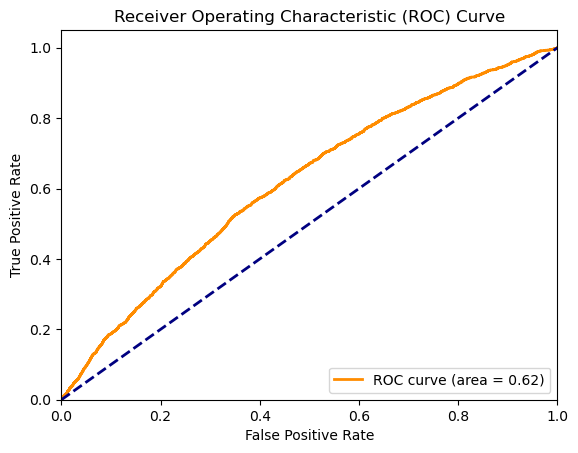

In [27]:
# Optionally, plot the ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Below Code is for predicting from web page

##Below Code is for predicting from web page

In [28]:
#May 10 Working Code
from flask import Flask, request, render_template
import pandas as pd
import joblib
from threading import Thread

app = Flask(__name__)
model = joblib.load('churn_model.pkl')  # Load the churn model
scaler = joblib.load('scaler.pkl')  # Load the scaler for consistent feature scaling

@app.route('/', methods=['GET'])
def home():
    return render_template('index.html')  # Display home page with file upload form

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    if not file:
        return "No file found"

    try:
        # Read the file based on its extension
        if file.filename.endswith('.xlsx'):
            data = pd.read_excel(file)
        elif file.filename.endswith('.csv'):
            data = pd.read_csv(file)
        else:
            return "Unsupported file type"
    except Exception as e:
        return f"Error processing the file: {str(e)}"

    # Ensure CustomerID is included in the data and handle if it's not
    if 'CustomerID' not in data.columns:
        return "CustomerID column is missing from the data."

    # Optionally limit the data to the first 10 records for demonstration
    data = data.head(50)

    # Separate CustomerID for output reference
    customer_ids = data['CustomerID']

    # Prepare data for prediction
    features = data.drop(columns=['CustomerID'])  # Drop CustomerID for prediction
    features_scaled = scaler.transform(features)  # Apply scaling

    # Perform predictions
    predictions = model.predict(features_scaled)
    results = [
        f"Customer {cid}: {'will stay with the company' if pred == 0 else 'is about to churn'}"
        for cid, pred in zip(customer_ids, predictions)
    ]

    return render_template('results.html', results=results)

def run_app():
    app.run(use_reloader=False, debug=True, port=5001)

# Run Flask in a separate thread to avoid blocking
thread = Thread(target=run_app)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [10/May/2024 23:39:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:39:34] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:39:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:44:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:45:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:48:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:48:57] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:50:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 23:50:36] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2024 00:16:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2024 00:17:07] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2024 00:17:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2024 00:17:49] "POST /predict HTTP/1.1" 200 -
